In [0]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.interpolate import make_interp_spline
from scipy.interpolate import interp1d

In [0]:
class Test:
    
    def __init__(self, x0, y0, zF, xD, xW, R, q):
        self.x0, self.y0, self.zF, self.xD, self.xW, self.R, self.q = x0, y0, zF, xD, xW, R, q
        self.line0 = make_interp_spline(x0, y0, k=3)
        self.line0x = make_interp_spline(y0, x0, k=3)
        if q == 1:
            self.crosspoint = [zF, R/(R+1)*zF + xD/(R+1)]
        else:
            _x = ((xD/(R+1))+(zF/(q-1)))/((q/(q-1))-(R/(R+1)))
            _y = (R/(R+1))*_x + xD/(R+1)
            self.crosspoint = [_x, _y]
        self.linexy = interp1d([0,100],[0,100],kind='linear')
        self.lineR = interp1d([self.crosspoint[0],self.xD],[self.crosspoint[1], self.xD],kind='linear', bounds_error=False)
        self.linet = interp1d([self.crosspoint[0],self.xW],[self.crosspoint[1], self.xW],kind='linear', bounds_error=False)
        self.lineq = interp1d([self.crosspoint[0],self.zF],[self.crosspoint[1], self.zF],kind='linear', bounds_error=False)
        
    def draw(self):
        fig = plt.figure()
        ax = fig.add_subplot(111)
        ax.set(aspect=1.0)
        plt.rcParams['savefig.dpi'] = 500 #图片像素
        plt.rcParams['figure.dpi'] = 500
        plt.xlim(0,1)
        plt.ylim(0,1)
        plt.xlabel('x')
        plt.ylabel('y')
        plt.scatter([self.crosspoint[0], ], [self.crosspoint[1], ], 10, color='k')
        plt.plot([self.xW, self.xW], [0, self.xW], color='k', linewidth=0.5, linestyle="--")
        plt.text(self.xW, 0, '$x_W$',ha='center', va='top', fontsize=10)
        plt.plot([self.xD, self.xD], [0, self.xD], color='k', linewidth=0.5, linestyle="--")
        plt.text(self.xD, 0, '$x_D$',ha='center', va='top', fontsize=10)
        plt.plot([self.zF, self.zF], [0, self.zF], color='k', linewidth=0.5, linestyle="--")
        plt.text(self.zF, 0, '$z_F$',ha='center', va='top', fontsize=10)
        plt.plot([self.crosspoint[0], self.crosspoint[0]], [0, self.crosspoint[1]], color='k', linewidth=0.5, linestyle="--")
        plt.text(self.crosspoint[0], 0, '$x_d$',ha='center', va='top', fontsize=10)
        X = np.arange(0,1,1/10000)
        plt.plot(X,self.line0(X),'k', linewidth=1.0)
        plt.plot([0,1],[0,1],'k', linewidth=1.0)
        plt.plot(X,self.lineR(X),'k', linewidth=1.0)
        plt.plot(X,self.linet(X),'k', linewidth=1.0)
        if self.q != 1:
            plt.plot(X,self.lineq(X),'k', linewidth=1.0)
        else:
            plt.plot([self.zF,self.zF], [self.zF, self.crosspoint[1]],'k', linewidth=1.0)
        k = 0
        x = self.xD
        lined = self.lineR
        flag = 0
        while x > self.xW:
            _x = x
            _y = lined(x)
            x = self.line0x(_y)
            if x > self.crosspoint[0]:
                lined = self.lineR
            elif x > self.xW:
                lined = self.linet
                if flag == 0:
                    print('进料板位置: ' + str(k+1) + '。')
                    flag = 1
            else:
                lined = lambda x:x
            plt.plot([_x, x],[_y, _y],'k', linewidth=1.0)
#             ax.annotate(str(k+1), xy=(x,_y), xytext=(x-0.02,_y))
            plt.text(x, _y, str(k+1),ha='center', va='bottom', fontsize=10)
            plt.plot([x, x],[_y, lined(x)],'k', linewidth=1.0)
            k += 1
        print('共' + str(k) + '块理论版。')
        

进料板位置: 8。
共13块理论版。


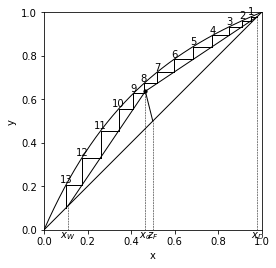

In [3]:
x0 = [0, 0.0196078, 0.0392156, 0.0588235, 0.0784313, 0.0980392, 0.1176471, 0.1372549, 0.1568627, 0.1764706, 0.1960784, 0.2156863, 0.2352941, 0.254902, 0.2745098, 0.2941176, 0.3137255, 0.3333333, 0.3529412, 0.372549, 0.3921569, 0.4117647, 0.4313725, 0.4509804, 0.4705882, 0.4901961, 0.5098039, 0.5294118, 0.5490196, 0.5686275, 0.5882353, 0.6078431, 0.627451, 0.6470588, 0.6666667, 0.6862745, 0.7058824, 0.7254902, 0.745098, 0.7647059, 0.7843137, 0.8039216, 0.8235294, 0.8431373, 0.8627451, 0.8823529, 0.9019608, 0.9215686, 0.9411765, 0.9607843, 0.9803922, 1]
y0 = [0, 0.0437029, 0.0856224, 0.1258286, 0.1643911, 0.2013788, 0.2368595, 0.2708994, 0.303563, 0.3349129, 0.3650094, 0.3939109, 0.4216732, 0.4483501, 0.4739928, 0.4986506, 0.5223702, 0.5451963, 0.5671715, 0.5883362, 0.6087289, 0.6283862, 0.6473428, 0.6656317, 0.6832842, 0.70033, 0.7167974, 0.7327131, 0.7481026, 0.76299, 0.7773982, 0.791349, 0.8048631, 0.8179601, 0.8306587, 0.8429768, 0.8549313, 0.8665382, 0.877813, 0.8887702, 0.899424, 0.9097874, 0.9198734, 0.9296939, 0.9392607, 0.9485847, 0.9576768, 0.966547, 0.9752052, 0.9836608, 0.9919228, 1]
Test(x0,y0,0.5,0.98,0.11,2,0.8).draw()